Brain and Tumor Detection Project

In [1]:
!pip install tensorflow 

In [3]:
!pip install ipywidgets


  Using cached ipywidgets-8.1.7-py3-none-any.whl.metadata (2.4 kB)
  Using cached widgetsnbextension-4.0.14-py3-none-any.whl.metadata (1.6 kB)
  Using cached jupyterlab_widgets-3.0.15-py3-none-any.whl.metadata (20 kB)
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ---- ----------------------------------- 0.3/2.2 MB ? eta -:--:--
   ---- ----------------------------------- 0.3/2.2 MB ? eta -:--:--
   ---- ----------------------------------- 0.3/2.2 MB ? eta -:--:--
   -------------- ------------------------- 0.8/2.2 MB 819.2 kB/s eta 0:00:02
   ------------------- -------------------- 1.0/2.2 MB 968.5 kB/s eta 0:00:02
   ------------------- -------------------- 1.0/2.2 MB 968.5 kB/s eta 0:00:02
   ------------------- -------------------- 1.0/2.2 MB 968.5 kB/s eta 0:00:02
   ---------------------------- ----------- 1.6/2.2 MB 892.3 kB/s eta 0:00:01
   --------------------------------- ------ 1.8/2.2 MB 932.3 kB/s eta 0:00:01
   -----------------------------------

In [2]:
#Step 1: Import Required Libraries
import os
import zipfile
import numpy as np
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [18]:
zip_path = r"D:\all projects\brain tumor detection\brain_tumor_dataset.zip"
extract_path = r"D:\all projects\brain tumor detection\brain_tumor_dataset"

# Extract only if not already extracted
if not os.path.exists(extract_path):
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_path)

print("Dataset extracted!")

Dataset extracted!


In [24]:
#Step 2: Load and Preprocess Dataset
data = []
labels = []

dataset_dir = r"D:\all projects\brain tumor detection\brain_tumor_dataset"
valid_categories = ['yes', 'no']
valid_extensions = ('.jpg', '.jpeg', '.png')

for category in os.listdir(dataset_dir):
    if category.lower() not in valid_categories:
        print(f"Skipping irrelevant folder: {category}")
        continue

    folder_path = os.path.join(dataset_dir, category)
    label = 1 if category.lower() == 'yes' else 0

    for img_name in os.listdir(folder_path):
        if img_name.lower().endswith(valid_extensions):
            img_path = os.path.join(folder_path, img_name)
            image = cv2.imread(img_path)
            if image is None:
                print(f"Unreadable image skipped: {img_path}")
                continue
            image = cv2.resize(image, (150, 150))  # Resize images to 150x150
            data.append(image)
            labels.append(label)

Skipping irrelevant folder: brain_tumor_dataset


In [25]:
# Convert to NumPy arrays and normalize
if len(data) == 0:
    print("ERROR: No valid images found!")
else:
    X = np.array(data) / 255.0
    y = np.array(labels)

    print(f"Total images loaded: {len(X)}")

Total images loaded: 253


In [26]:
#Step 3: Split Dataset
# Split only if data is loaded
if len(X) > 0:
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )
    print(f"Training samples: {len(X_train)}, Testing samples: {len(X_test)}")

Training samples: 202, Testing samples: 51


In [29]:
#Step 4: Define CNN Model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(pool_size=(2,2)),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Binary classification: tumor/no tumor
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [30]:
#Step 5: Train the Model
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 8s 706ms/step - accuracy: 0.5593 - loss: 0.7679 - val_accuracy: 0.8039 - val_loss: 0.5597
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 503ms/step - accuracy: 0.7539 - loss: 0.5804 - val_accuracy: 0.8235 - val_loss: 0.4264
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 456ms/step - accuracy: 0.7642 - loss: 0.5224 - val_accuracy: 0.8039 - val_loss: 0.4191
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 448ms/step - accuracy: 0.7851 - loss: 0.5109 - val_accuracy: 0.8039 - val_loss: 0.4521
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 449ms/step - accuracy: 0.7819 - loss: 0.4912 - val_accuracy: 0.7843 - val_loss: 0.4239
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 454ms/step - accuracy: 0.8112 - loss: 0.4046 - val_accuracy: 0.9020 - val_loss: 0.3515
Epoch 7/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 454ms/step - accuracy: 0.8318 - loss: 0.3677 - val_accuracy: 0.9020 - val_loss: 0.3589
Epoch 8/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 455ms/step - accuracy: 0.8858 - loss: 0.3309 - val_accuracy: 0.9020 - val_loss:

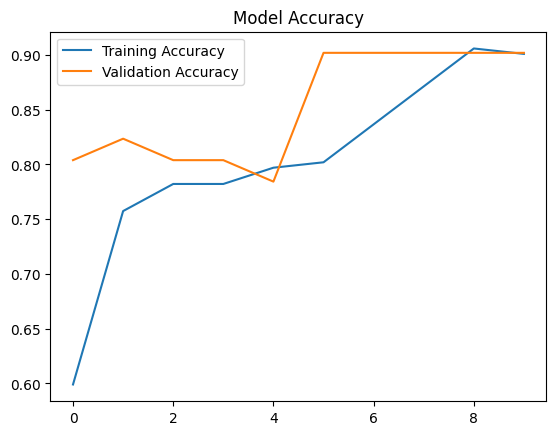

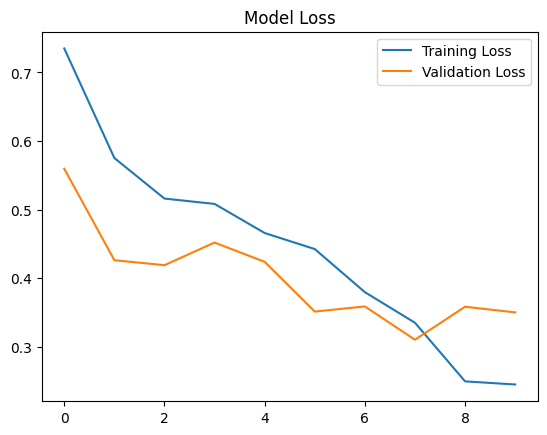

In [31]:
#Step 6: Visualize Accuracy & Loss
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Model Accuracy")
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Model Loss")
plt.legend()
plt.show()


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
Classification Report:

              precision    recall  f1-score   support

           0       1.00      0.75      0.86        20
           1       0.86      1.00      0.93        31

    accuracy                           0.90        51
   macro avg       0.93      0.88      0.89        51
weighted avg       0.92      0.90      0.90        51



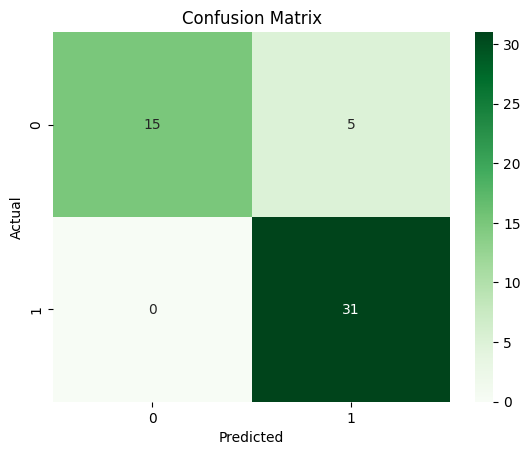

In [33]:
#Step 7: Evaluation (Confusion Matrix, Classification Report)
y_pred = (model.predict(X_test) > 0.5).astype("int32")

print("Classification Report:\n")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [37]:
# save model
model.save(r"D:\all projects\brain tumor detection\brain_tumor_model.h5")

In [1]:
from tensorflow.keras.models import load_model

# Load trained model
model_path = r"D:\all projects\brain tumor detection\brain_tumor_model.h5"
model = load_model(model_path)
print("Model loaded!")


Model loaded!


In [18]:
from ipywidgets import FileUpload
import io
import matplotlib.pyplot as plt

uploader = FileUpload(accept='image/*', multiple=True)
display(uploader)

FileUpload(value=(), accept='image/*', description='Upload', multiple=True)

In [19]:
# Function to process uploaded images
def process_uploaded_images(uploader):
    images = []
    labels = []
    
    for file in uploader.value:
        name = file['name']
        content = file['content']
        
        image = Image.open(io.BytesIO(content)).convert('RGB')
        image = image.resize((150, 150))
        img_array = np.array(image) / 255.0
        images.append(img_array)
        labels.append(name)
    
    return np.array(images), labels


In [20]:
# Function to predict and show images
def predict_and_show(model, images, labels):
    predictions = model.predict(images)
    
    plt.figure(figsize=(12,8))
    for i in range(len(images)):
        plt.subplot(2,2,i+1)
        plt.imshow(images[i])
        result = "Tumor" if predictions[i][0] > 0.5 else "No Tumor"
        plt.title(f"{labels[i]}\n{result} ({predictions[i][0]:.2f})")
        plt.axis('off')
    plt.show()

In [21]:
# Run this after uploading images
def run_prediction():
    if len(uploader.value) == 0:
        print("Please upload images first.")
    else:
        images, labels = process_uploaded_images(uploader)
        predict_and_show(model, images, labels)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


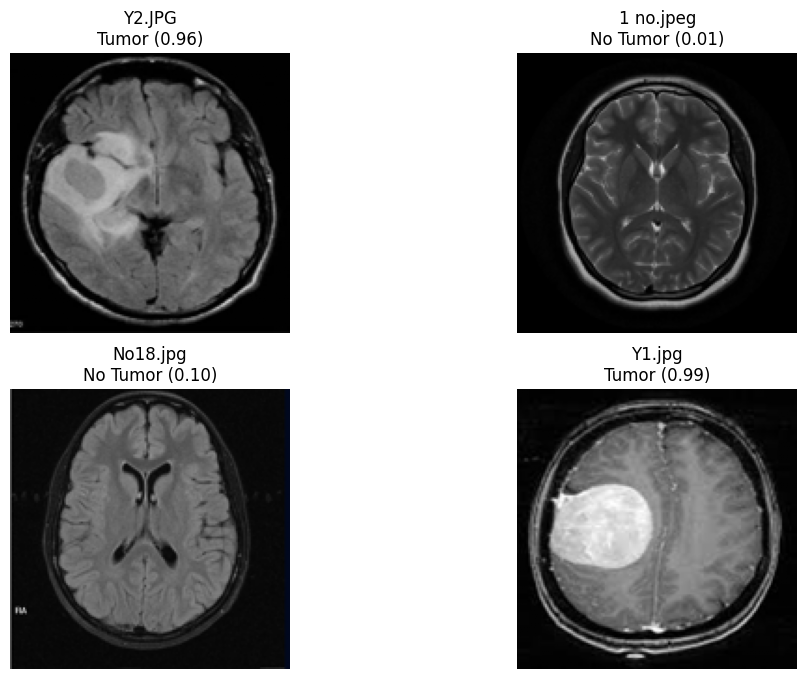

In [22]:
run_prediction()